In [1]:
# 
import os 
import time

import numpy as np
import matplotlib.pyplot as plt

from datasets import load_4d_dicom
from transforms import RandomFlip, RandomRotate, RandomRotate90, RandomContrast, Normalize, ElasticDeformation, AdditiveGaussianNoise, AdditivePoissonNoise,Standardize
from utils import display_4d_image, plot_cdf, make_hist_equalize, plot_intensity_histogram,calc_gray_overcast, seed_everything

import h5py

In [2]:
# 
patient_dir = "../dataset/TracPETperf-D2-PhantomExperiments2/PT_20p 150_120 OSEM"

slices_np = load_4d_dicom(patient_dir)

base_name = os.path.basename(patient_dir)
print(f"Loaded...{base_name} dtype:{slices_np.dtype} (shape:{slices_np.shape}; range:[{np.min(slices_np)},{np.max(slices_np)}]; mean:{np.mean(slices_np)}; std:{np.std(slices_np)})")

display_4d_image(slices_np)

Loaded...PT_20p 150_120 OSEM dtype:int16 (shape:(24, 71, 192, 192); range:[-32767,32767]; mean:201.12048776036573; std:1412.4139804758772)


interactive(children=(IntSlider(value=0, description='Time', max=23), IntSlider(value=0, description='Slice', …

In [3]:
#
seed = 80 
rs = np.random.RandomState(seed)

# 
time_idx = 11
depth_idx = 38

### RandomFlip(3D)

Randomly flips the image across the given axes. Image can be either 3D (DxHxW) or 4D (CxDxHxW).

When creating make sure that the provided RandomStates are consistent between raw and labeled datasets, otherwise the models won't converge.

(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.69850887006064 std:1348.793186907172
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.69850887006064 std:1348.7931869071724
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.69850887006064 std:1348.7931869071733
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.69850887006064 std:1348.793186907172
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.69850887006064 std:1348.7931869071726
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.69850887006064 std:1348.7931869071724
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.69850887006064 std:1348.7931869071726
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.69850887006064 std:1348.793186907173
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.69850887006064 std:1348.793186907172
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.69850887006064 std:1348.7931869071724
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.69850887

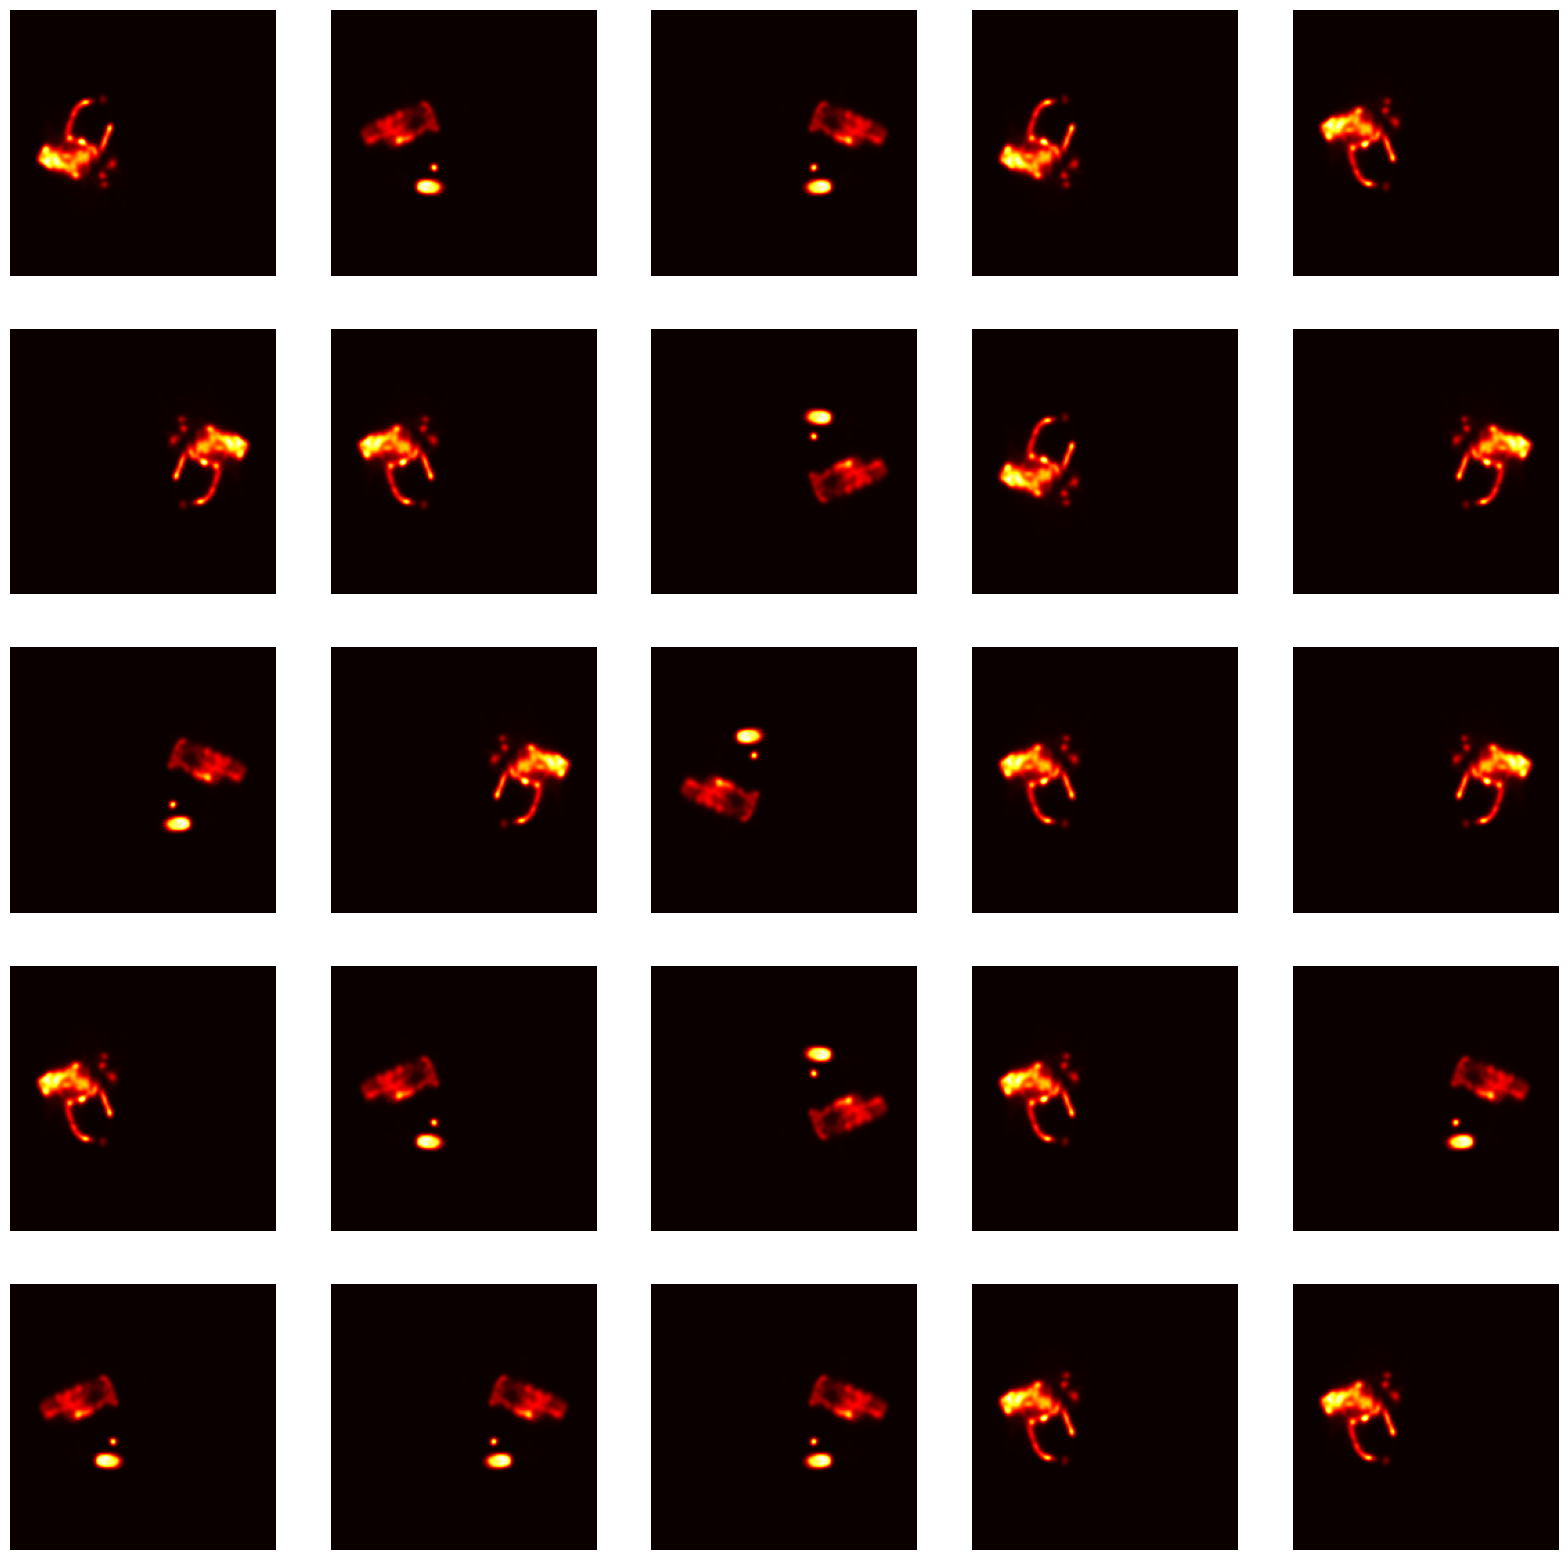

In [4]:
#
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
ax = axes.ravel()

raw = slices_np[time_idx]
ax[0].imshow(raw[depth_idx], cmap='hot')
ax[0].set_axis_off()
print(f"{raw.shape} dtype:{raw.dtype} range:({np.min(raw)}，{np.max(raw)}) mean:{np.mean(raw)} std:{np.std(raw)}")


# RandomFlip
t = RandomFlip(rs)


#
for i in range(1, 25):
    ax[i].set_axis_off()
    aug = t(raw)
    ax[i].imshow(aug[depth_idx], cmap='hot')
    print(f"{aug.shape} dtype:{aug.dtype} range:({np.min(aug)}，{np.max(aug)}) mean:{np.mean(aug)} std:{np.std(aug)}")

### RandomRotate90(3D)

 Rotate an array by 90 degrees around a randomly chosen plane. Image can be either 3D (DxHxW) or 4D (CxDxHxW).

 When creating make sure that the provided RandomStates are consistent between raw and labeled datasets, otherwise the models won't converge.

 <span style='color:red'>IMPORTANT: assumes DHW axis order (that's why rotation is performed across (1,2) axis)</span>

(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.69850887006064 std:1348.793186907172
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.69850887006064 std:1348.7931869071724
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.69850887006064 std:1348.7931869071722
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.69850887006064 std:1348.7931869071722
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.69850887006064 std:1348.7931869071722
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.69850887006064 std:1348.793186907172
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.69850887006064 std:1348.793186907172
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.69850887006064 std:1348.7931869071722
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.69850887006064 std:1348.7931869071726
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.69850887006064 std:1348.7931869071722
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.6985088

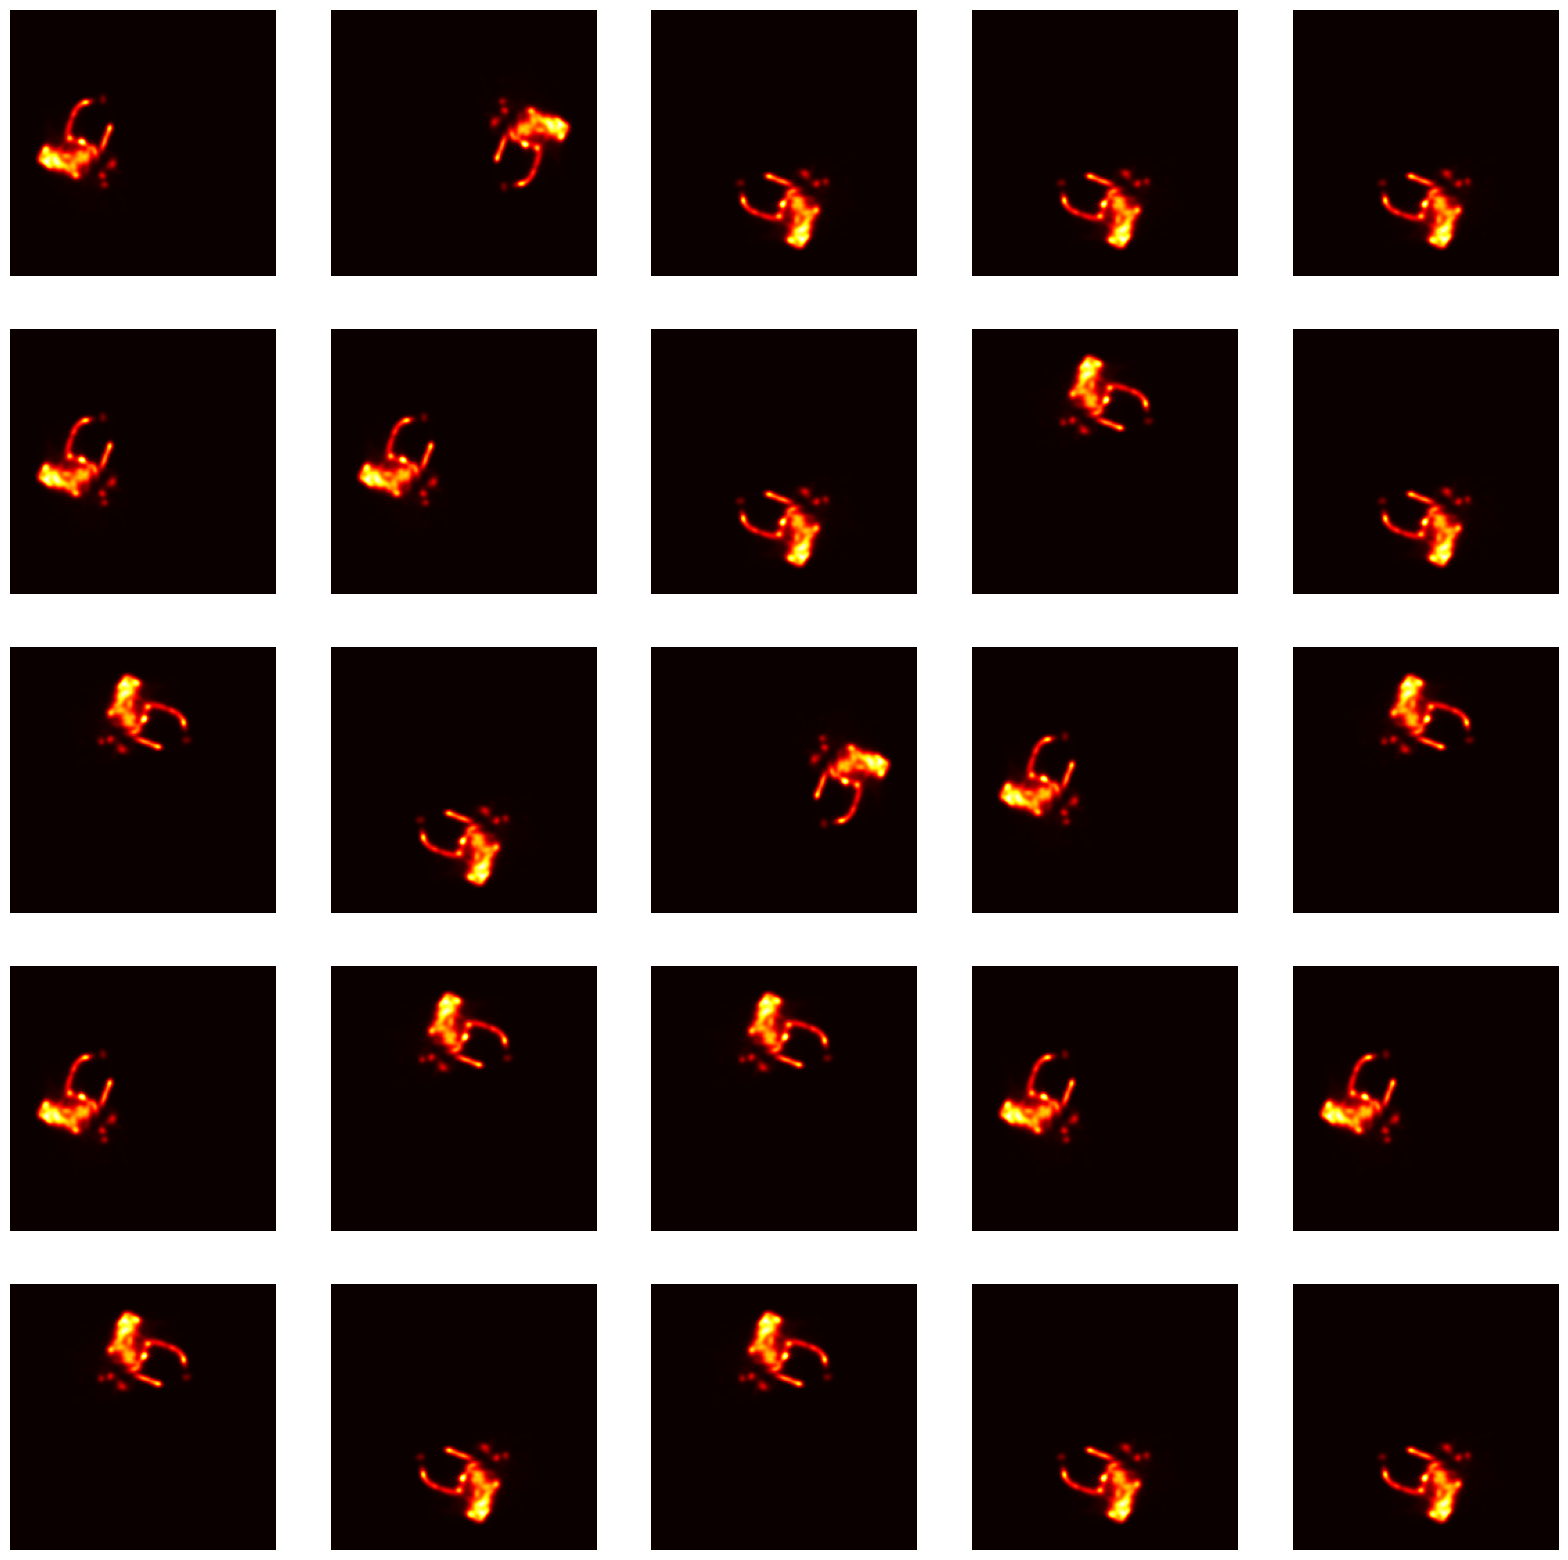

In [5]:
#
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
ax = axes.ravel()

raw = slices_np[time_idx]
ax[0].imshow(raw[depth_idx], cmap='hot')
ax[0].set_axis_off()
print(f"{raw.shape} dtype:{raw.dtype} range:({np.min(raw)}，{np.max(raw)}) mean:{np.mean(raw)} std:{np.std(raw)}")


#RandomRotate90
# seed = 80
# rs = np.random.RandomState(seed)
t = RandomRotate90(rs)

#
for i in range(1, 25):
    ax[i].set_axis_off()
    aug = t(raw)
    ax[i].imshow(aug[depth_idx], cmap='hot')
    print(f"{aug.shape} dtype:{aug.dtype} range:({np.min(aug)}，{np.max(aug)}) mean:{np.mean(aug)} std:{np.std(aug)}")

### RandomRotate(3D) 

Rotate an array by a random degrees from taken from (-angle_spectrum, angle_spectrum) interval.

Rotation axis is picked at random from the list of provided axes.

<span style="color:red"> Warning: RandomRotate may cause artifact </span>

(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.69850887006064 std:1348.793186907172
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:177.93564965094384 std:1350.6848701515146
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.49166979961365 std:1347.3060282769422
(71, 192, 192) dtype:int16 range:(-5426，32767) mean:175.98041182206083 std:1349.512281266281
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:174.28999627102894 std:1346.5050970546013
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:174.70210373569543 std:1349.9147149118437
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:177.73782085961952 std:1353.0073447917666
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:179.41042942769465 std:1353.3091180347203
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:174.10169813368054 std:1349.4944734450419
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:175.672021713615 std:1348.0153852561755
(71, 192, 192) dtype:int16 range:(-5526，32767) mean:179.54652158

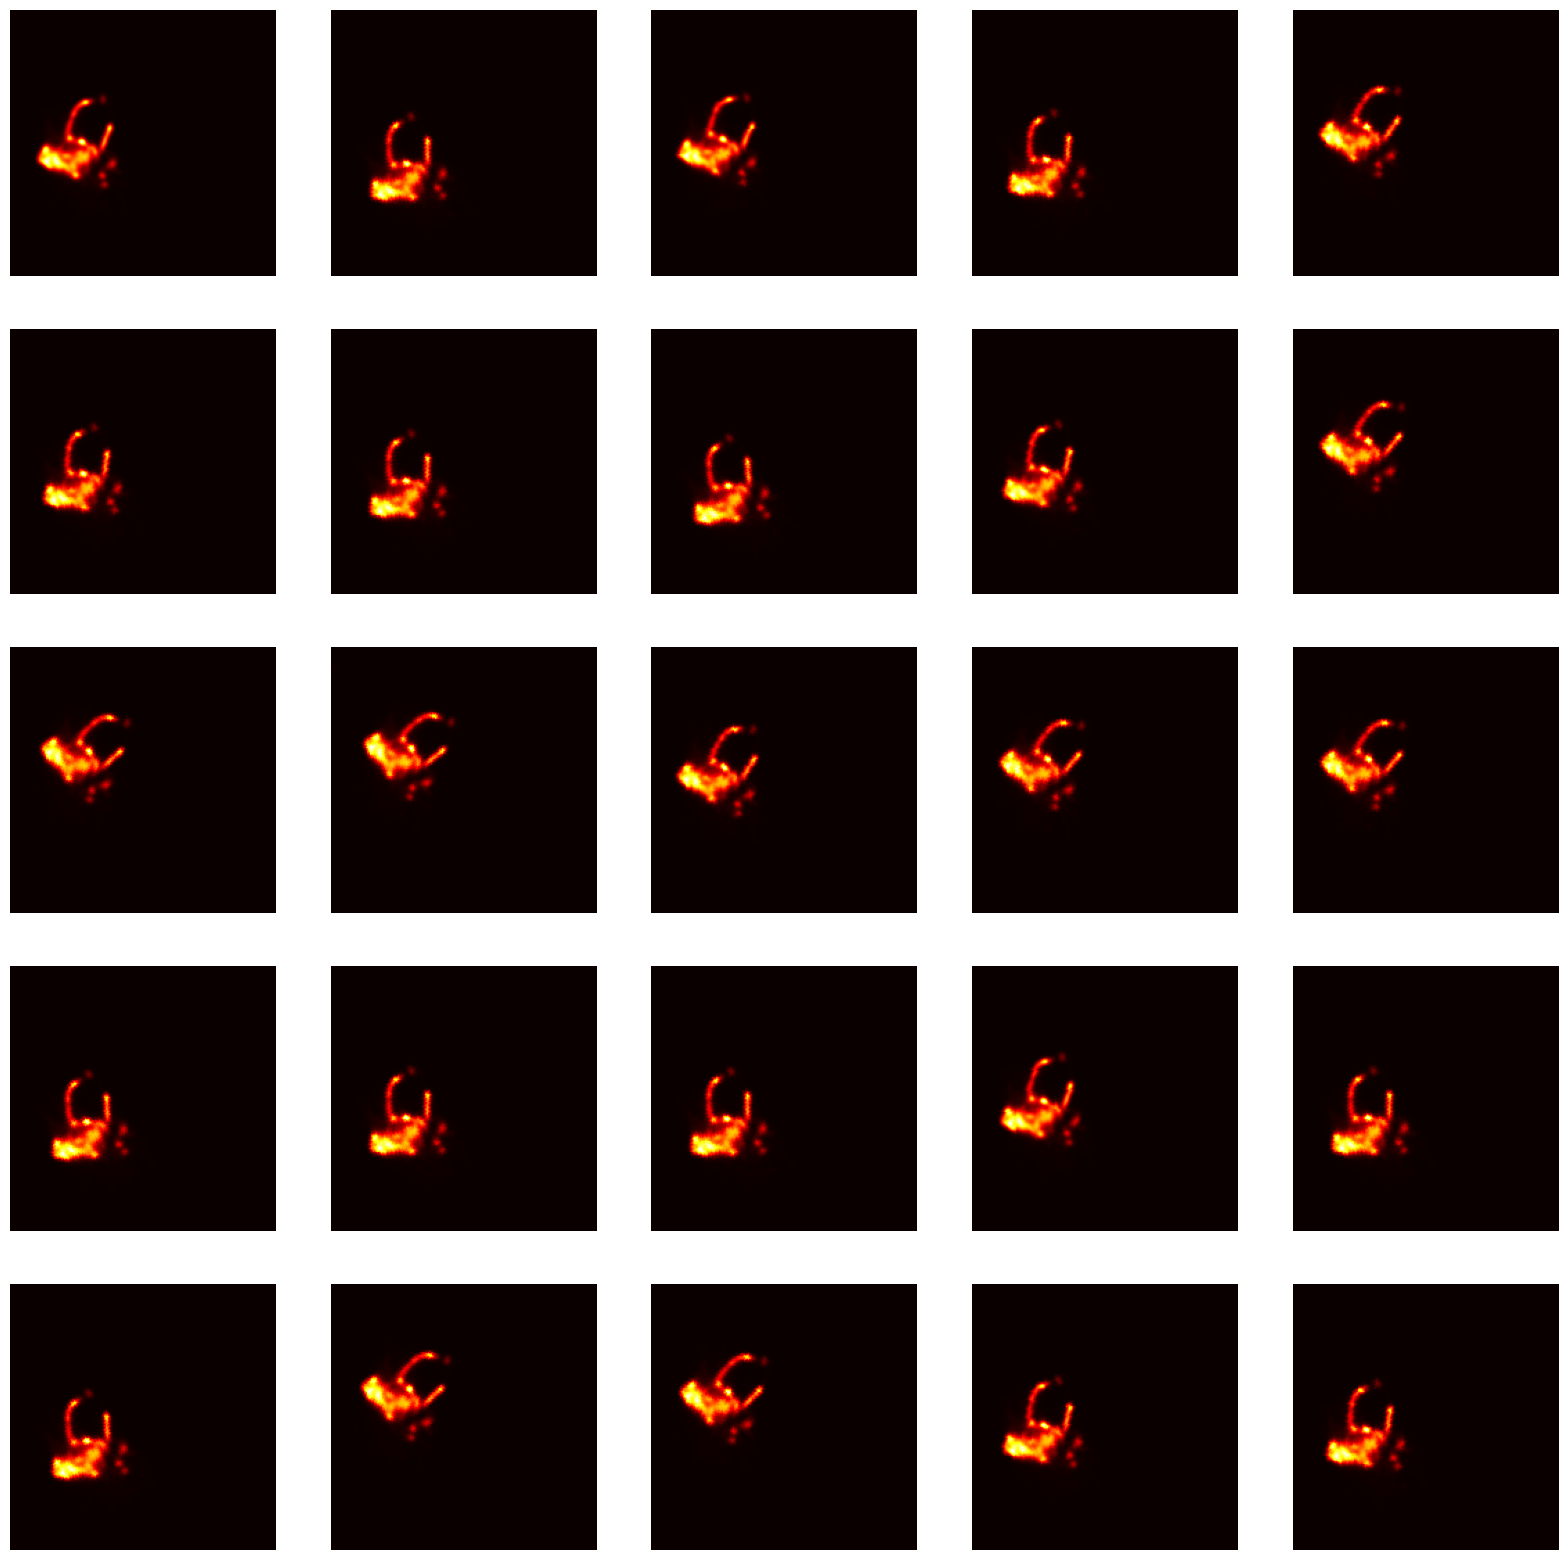

In [6]:
#
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
ax = axes.ravel()

raw = slices_np[time_idx]
ax[0].imshow(raw[depth_idx], cmap='hot')
ax[0].set_axis_off()
print(f"{raw.shape} dtype:{raw.dtype} range:({np.min(raw)}，{np.max(raw)}) mean:{np.mean(raw)} std:{np.std(raw)}")


# RandomRotate
# seed = 80
# rs = np.random.RandomState(seed)
#t = RandomRotate(rs, angle_spectrum=30)
t = RandomRotate(rs, angle_spectrum=30, axes=[(1, 2)] ,mode='reflect')

# 
for i in range(1, 25):
    ax[i].set_axis_off()
    aug = t(raw)
    ax[i].imshow(aug[depth_idx], cmap='hot')
    print(f"{aug.shape} dtype:{aug.dtype} range:({np.min(aug)}，{np.max(aug)}) mean:{np.mean(aug)} std:{np.std(aug)}")

### ElasticDeformation

Apply elasitc deformations of 3D patches on a per-voxel mesh. Assumes ZYX axis order (or CZYX if the data is 4D).
    Based on: https://github.com/fcalvet/image_tools/blob/master/image_augmentation.py#L62


(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.69850887006064 std:1348.793186907172
(71, 192, 192) dtype:int16 range:(-5386，32767) mean:172.72505295444543 std:1350.6870447706815
(71, 192, 192) dtype:int16 range:(-5168，32767) mean:170.6473352375538 std:1328.860894864708
(71, 192, 192) dtype:int16 range:(-5190，32767) mean:175.89350998569543 std:1352.0538743393054
(71, 192, 192) dtype:int16 range:(-3745，32767) mean:171.20723298122067 std:1328.6814226150536
(71, 192, 192) dtype:int16 range:(-5487，32767) mean:178.90410202098005 std:1389.9829779287572
(71, 192, 192) dtype:int16 range:(-4889，32767) mean:174.11479079555457 std:1356.4208348098346
(71, 192, 192) dtype:int16 range:(-5217，32767) mean:173.32224040859742 std:1339.1023609880267
(71, 192, 192) dtype:int16 range:(-4408，32767) mean:176.8898593383216 std:1369.1627879555676


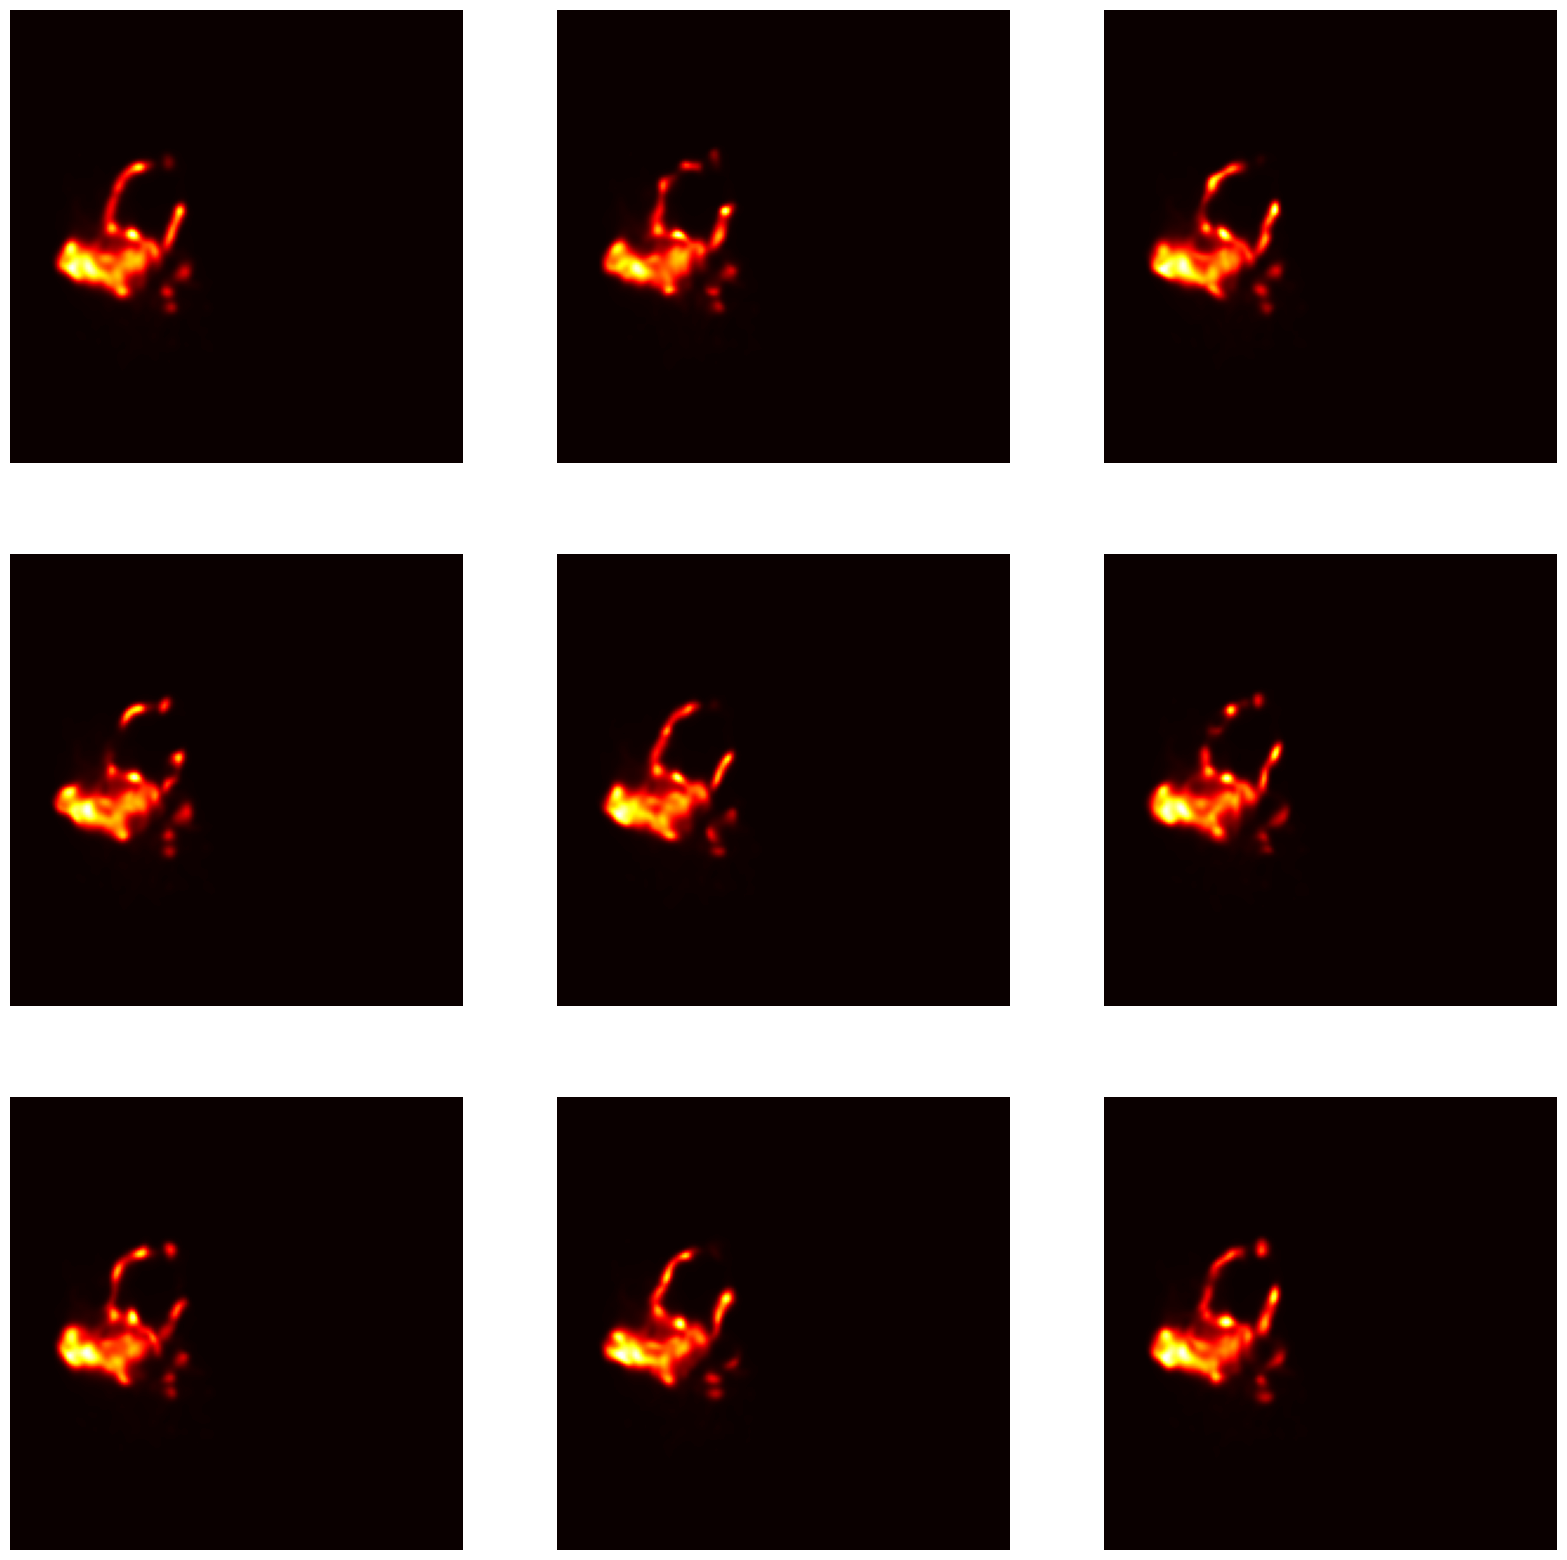

In [7]:
#
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
ax = axes.ravel()

raw = slices_np[time_idx]
ax[0].imshow(raw[depth_idx], cmap='hot')
ax[0].set_axis_off()
print(f"{raw.shape} dtype:{raw.dtype} range:({np.min(raw)}，{np.max(raw)}) mean:{np.mean(raw)} std:{np.std(raw)}")


# ElasticDeformation
# seed = 80
# rs = np.random.RandomState(seed)
#t = ElasticDeformation(np.random.RandomState(), spline_order=3, execution_probability=1)
t = ElasticDeformation(rs, 3, alpha=20, sigma=3, execution_probability=1.0)

#
for i in range(1, 9):
    ax[i].set_axis_off()
    aug = t(raw)
    ax[i].imshow(aug[depth_idx], cmap='hot')
    print(f"{aug.shape} dtype:{aug.dtype} range:({np.min(aug)}，{np.max(aug)}) mean:{np.mean(aug)} std:{np.std(aug)}")

### RandomContrast

Adjust contrast by scaling each voxel to `mean + alpha * (v - mean)`

(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.69850887006064 std:1348.793186907172
(71, 192, 192) dtype:float64 range:(-1.0，1.0) mean:0.3631987776879467 std:0.5143045594333401
(71, 192, 192) dtype:float64 range:(-1.0，1.0) mean:0.37963141260759 std:0.5341377166996908
(71, 192, 192) dtype:float64 range:(-1.0，1.0) mean:0.37963141260759 std:0.5341377166996908
(71, 192, 192) dtype:float64 range:(-1.0，1.0) mean:0.37963141260759 std:0.5341377166996908
(71, 192, 192) dtype:float64 range:(-1.0，1.0) mean:0.3600497535280595 std:0.5117298207644871
(71, 192, 192) dtype:float64 range:(-1.0，1.0) mean:0.36328047373064654 std:0.5143767729893004
(71, 192, 192) dtype:float64 range:(-1.0，1.0) mean:0.37963141260759 std:0.5341377166996908
(71, 192, 192) dtype:float64 range:(-1.0，1.0) mean:0.37963141260759 std:0.5341377166996908


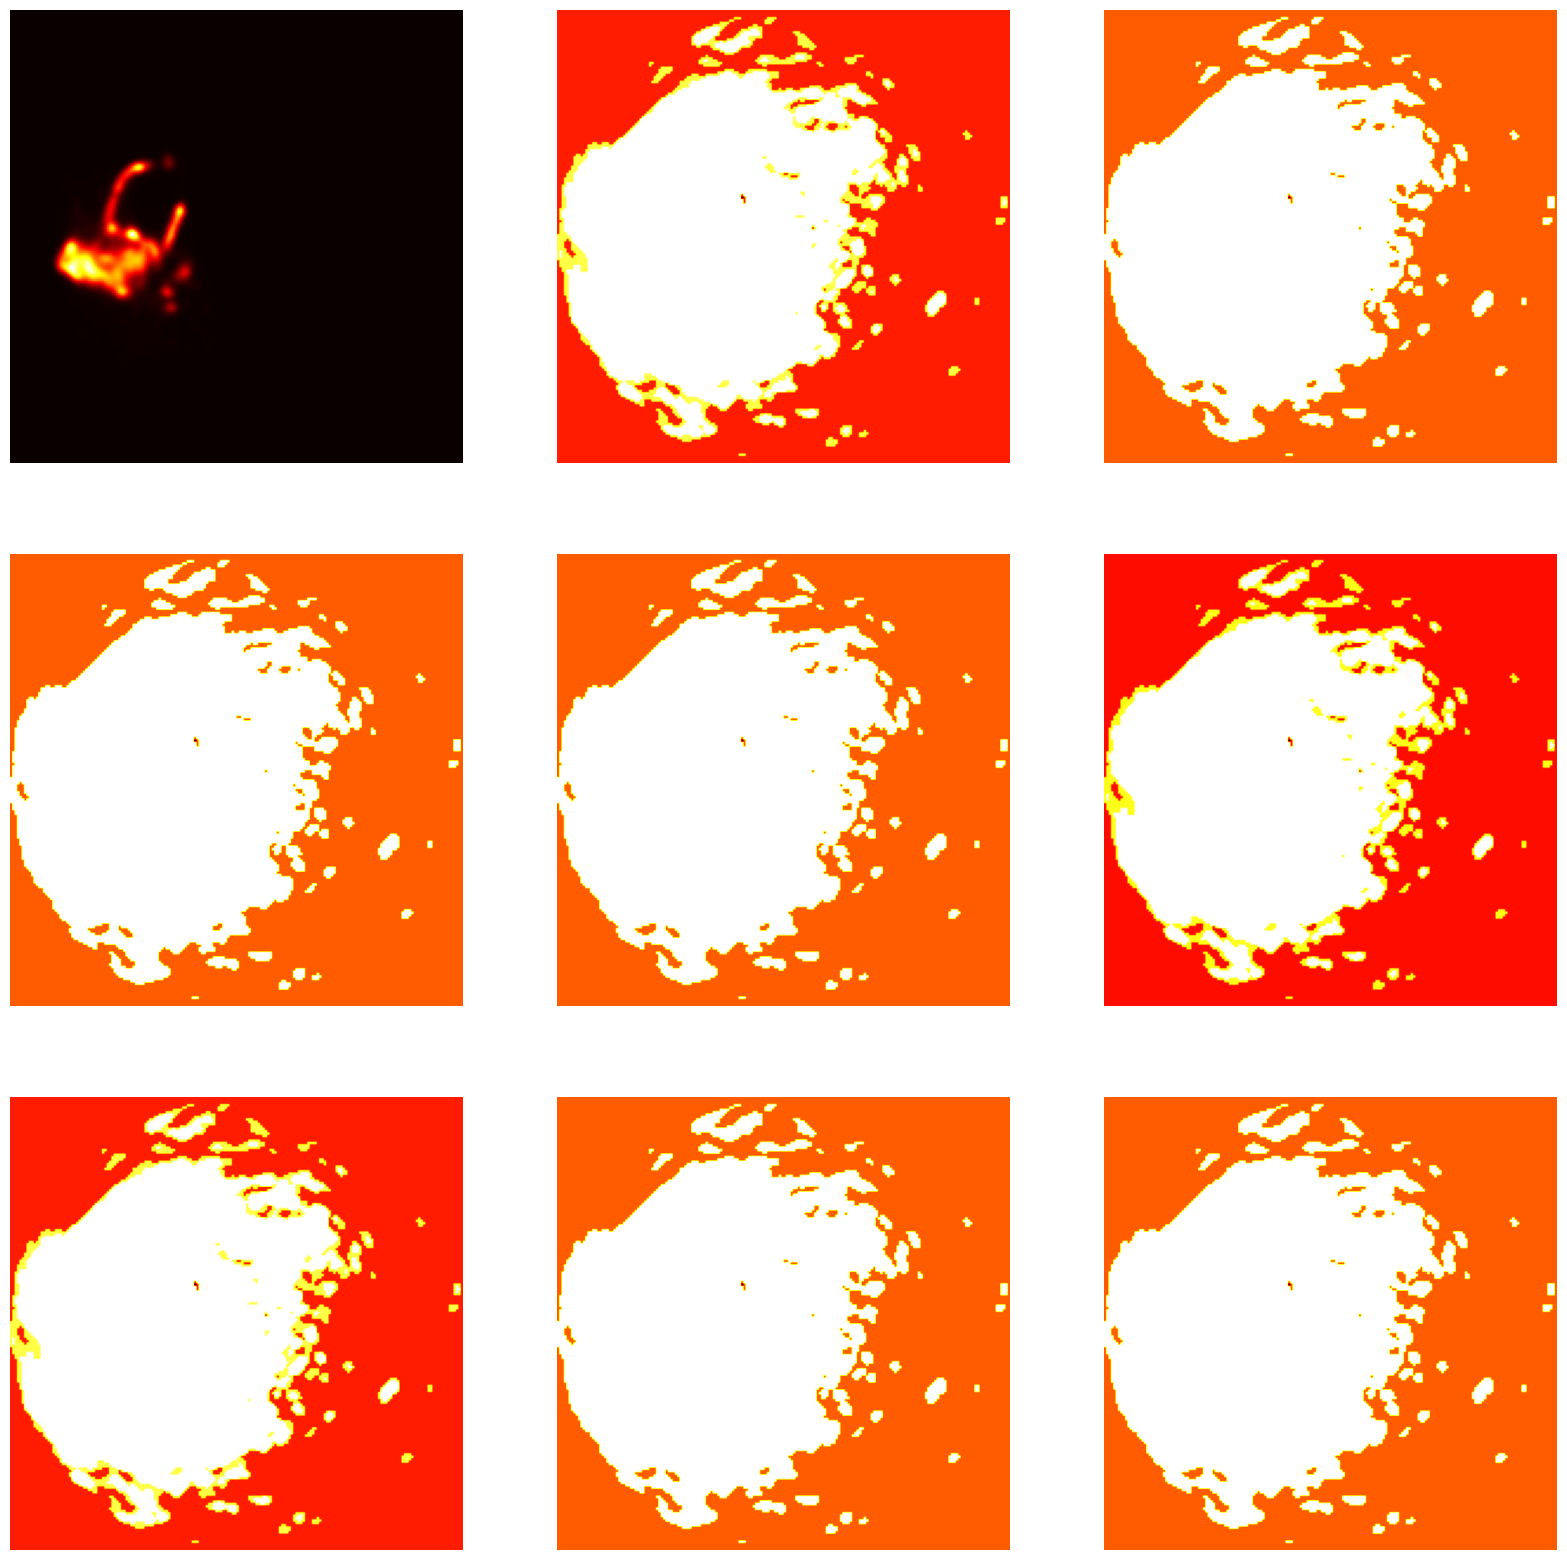

In [8]:
#
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
ax = axes.ravel()

raw = slices_np[time_idx]
ax[0].imshow(raw[depth_idx], cmap='hot')
ax[0].set_axis_off()
print(f"{raw.shape} dtype:{raw.dtype} range:({np.min(raw)}，{np.max(raw)}) mean:{np.mean(raw)} std:{np.std(raw)}")


# RandomContrast
# seed = 80
# rs = np.random.RandomState(seed)
t = RandomContrast(rs, alpha=(0.5, 1.5), execution_probability=1.0)


# 
for i in range(1, 9):
    ax[i].set_axis_off()
    aug = t(raw)
    ax[i].imshow(aug[depth_idx], cmap='hot')
    print(f"{aug.shape} dtype:{aug.dtype} range:({np.min(aug)}，{np.max(aug)}) mean:{np.mean(aug)} std:{np.std(aug)}")

### Standardize + AdditiveGaussianNoise

for 16-bit gray-scale image(0-65535)

std 
low-level : 10-50

mid-level : 50-200

high-level : 200-1000

(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.69850887006064 std:1348.793186907172
(71, 192, 192) dtype:float64 range:(-5317.332849754412，33331.852241095075) mean:173.83440098103472 std:1378.159412064501
(71, 192, 192) dtype:float64 range:(-5520.99174520323，33037.853573297696) mean:173.69108668989185 std:1353.9336526787788
(71, 192, 192) dtype:float64 range:(-6229.57531534348，33893.30198719764) mean:174.17526291862762 std:1432.186599608568
(71, 192, 192) dtype:float64 range:(-6048.817314023442，33343.76680187038) mean:173.71672081897512 std:1380.260383678715
(71, 192, 192) dtype:float64 range:(-7026.396937728417，34557.47562614592) mean:174.27837257648298 std:1597.68305960954
(71, 192, 192) dtype:float64 range:(-5551.716468969744，34013.996154551554) mean:173.26354449516828 std:1445.2431169684053
(71, 192, 192) dtype:float64 range:(-6061.396905962026，33655.852906401655) mean:173.88208180915223 std:1389.13659001653
(71, 192, 192) dtype:float64 range:(-6589.219506321613，34513.6322

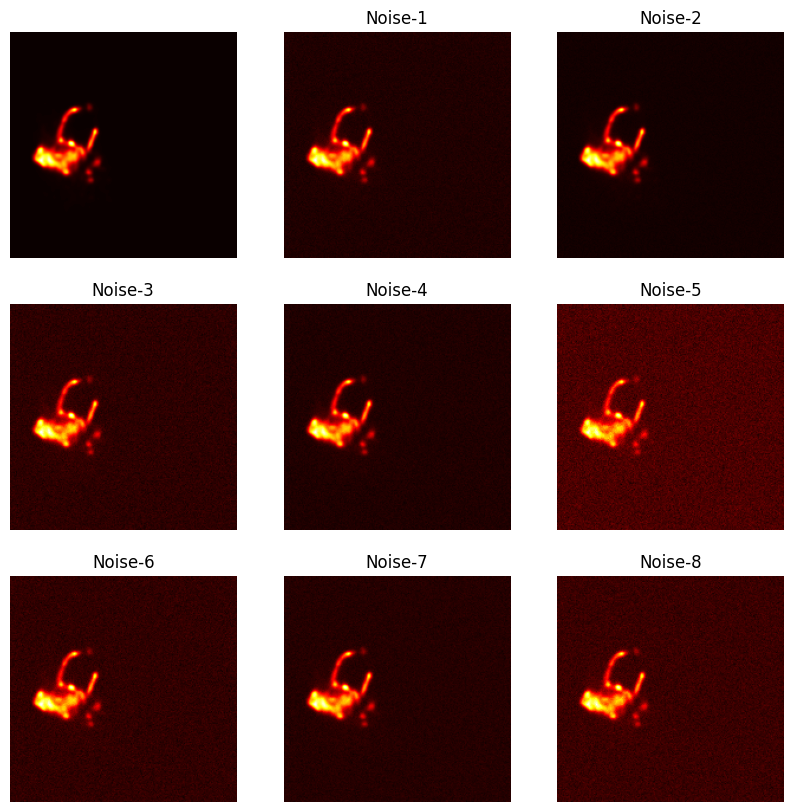

In [9]:
#
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
ax = axes.ravel()

raw = slices_np[time_idx]
ax[0].imshow(raw[depth_idx], cmap='hot')
ax[0].set_axis_off()
print(f"{raw.shape} dtype:{raw.dtype} range:({np.min(raw)}，{np.max(raw)}) mean:{np.mean(raw)} std:{np.std(raw)}")


# AdditiveGaussianNoise
#normalize = Normalize(min_value=0.0, max_value=1.0)
#standardize = Standardize()
add_gaussian_noise = AdditiveGaussianNoise(rs, scale=(100, 900.0), execution_probability=1.0)


# 
for i in range(1, 9):
    ax[i].set_title(f'Noise-{i}')
    #aug = normalize(raw)
    #aug = standardize(raw)
    aug = add_gaussian_noise(raw)
    ax[i].imshow(aug[depth_idx], cmap='hot')
    ax[i].set_axis_off()
    print(f"{aug.shape} dtype:{aug.dtype} range:({np.min(aug)}，{np.max(aug)}) mean:{np.mean(aug)} std:{np.std(aug)}")

### Standardize + AdditivePoissonNoise

(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.69850887006064 std:1348.793186907172
(71, 192, 192) dtype:float64 range:(-4.151636116809247，28.16478805462198) mean:0.7995315098053598 std:1.3419124505164848
(71, 192, 192) dtype:float64 range:(-4.151636116809247，27.66953051144611) mean:0.7999777637177229 std:1.3421452692896378
(71, 192, 192) dtype:float64 range:(-4.151636116809247，29.052094721444234) mean:0.7990860200264083 std:1.3416973054271757
(71, 192, 192) dtype:float64 range:(-4.1012206782823615，28.16478805462198) mean:0.799257950044014 std:1.3406912494112715
(71, 192, 192) dtype:float64 range:(-4.048581029232232，27.16478805462198) mean:0.8004427388986697 std:1.3419789568447704
(71, 192, 192) dtype:float64 range:(-4.119014362468321，29.16404665111423) mean:0.7991907063037949 std:1.3406326675399665
(71, 192, 192) dtype:float64 range:(-4.048581029232232，29.16478805462198) mean:0.7992281488409624 std:1.3408225353517709
(71, 192, 192) dtype:float64 range:(-4.1012206782823615，30.

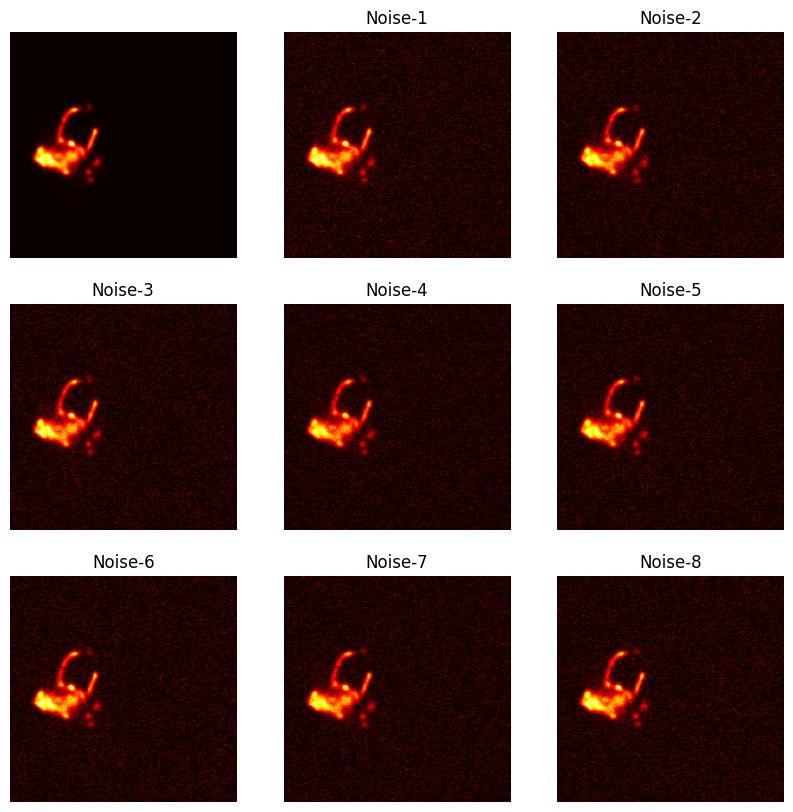

In [10]:
#
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
ax = axes.ravel()

raw = slices_np[time_idx]
ax[0].imshow(raw[depth_idx], cmap='hot')
ax[0].set_axis_off()
print(f"{raw.shape} dtype:{raw.dtype} range:({np.min(raw)}，{np.max(raw)}) mean:{np.mean(raw)} std:{np.std(raw)}")


# AdditiveGaussianNoise
#normalize = Normalize(min_value=0.0, max_value=1.0)
standardize = Standardize()
add_poisson_noise = AdditivePoissonNoise(rs, lam=(0.8, 0.8), execution_probability=1.0)

# 
for i in range(1, 9):
    ax[i].set_title(f'Noise-{i}')
    #aug = normalize(raw)
    aug = standardize(raw)
    aug = add_poisson_noise(aug)
    ax[i].imshow(aug[depth_idx], cmap='hot')
    ax[i].set_axis_off()
    print(f"{aug.shape} dtype:{aug.dtype} range:({np.min(aug)}，{np.max(aug)}) mean:{np.mean(aug)} std:{np.std(aug)}")

### Normalize + Standarize

(71, 192, 192) dtype:int16 range:(-5526，32767) mean:173.69850887006064 std:1348.793186907172
(71, 192, 192) dtype:float64 range:(-4.225776467584078，24.16478805462198) mean:8.252831560202651e-18 std:1.0000000000000002
(71, 192, 192) dtype:float64 range:(-1.0，1.0) mean:-0.08093880191554113 std:0.1859434881053786
(71, 192, 192) dtype:float64 range:(-4.942690961909916，5.813265164214555) mean:7.705538519894475e-17 std:0.9999999999999996


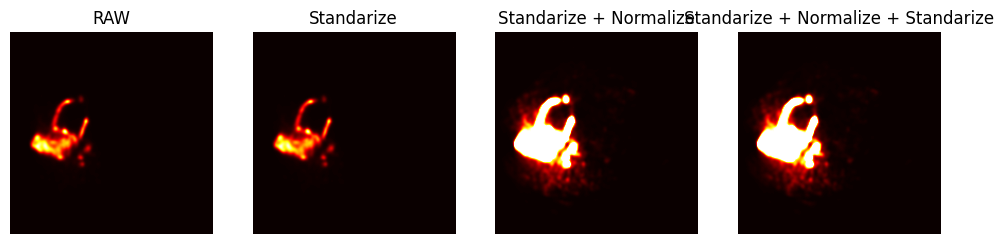

In [11]:
# 
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
ax = axes.ravel()

img = slices_np[time_idx]
ax[0].imshow(img[depth_idx], cmap='hot')
ax[0].set_axis_off()
ax[0].set_title("RAW")
print(f"{img.shape} dtype:{img.dtype} range:({np.min(img)}，{np.max(img)}) mean:{np.mean(img)} std:{np.std(img)}")


# 1. Standarize
t = Standardize()

img = slices_np[time_idx]
img = t(img)

ax[1].imshow(img[depth_idx], cmap='hot')
ax[1].set_axis_off()
ax[1].set_title("Standarize")

print(f"{img.shape} dtype:{img.dtype} range:({np.min(img)}，{np.max(img)}) mean:{np.mean(img)} std:{np.std(img)}")


# 2. Standarize + Normalize 
t = Normalize(min_value=-1.0, max_value=1.0)
# #t = Normalize(min_value=np.min(img), max_value=np.max(img))

img = t(img)

ax[2].imshow(img[depth_idx], cmap='hot')
ax[2].set_axis_off()
ax[2].set_title("Standarize + Normalize")
print(f"{img.shape} dtype:{img.dtype} range:({np.min(img)}，{np.max(img)}) mean:{np.mean(img)} std:{np.std(img)}")


# 3. Standarize + Normalize  + Standarize
t = Standardize()
img = t(img)

ax[3].imshow(img[depth_idx], cmap='hot')
ax[3].set_axis_off()
ax[3].set_title("Standarize + Normalize + Standarize")

print(f"{img.shape} dtype:{img.dtype} range:({np.min(img)}，{np.max(img)}) mean:{np.mean(img)} std:{np.std(img)}")

### Histogram equalization

### e.g. 4D Data Augmentation 

In [ ]:
seeds = [80, 81, 82, 83, 84, 85, 86, 87, 88, 89]

# apply transform 
batch_all = []
batch_all.append(slices_np)
for seed in seeds:
    time_all = []
    for time_frame in slices_np:
        rs = np.random.RandomState(seed)
        # define transform 
        #aug = RandomRotate(rs, angle_spectrum=30, axes=[(1, 2)] ,mode='reflect')(time_frame) # this may cause artifact 
        aug = RandomRotate90(rs)(time_frame)
        aug = ElasticDeformation(rs, 3, alpha=20, sigma=3, execution_probability=1.0)(aug)
        #aug = Standardize()(aug)
        #aug = AdditiveGaussianNoise(rs, scale=(0.0, 1.0), execution_probability=1.0)(aug)
        #aug = AdditivePoissonNoise(rs, lam=(0.5, 0.5), execution_probability=1.0)(aug)
        time_all.append(aug)
        
    batch_all.append(np.array(time_all)) 

batch_all = np.array(batch_all)

In [ ]:
display_4d_image(batch_all[0])
display_4d_image(batch_all[-1])

In [ ]:
img = batch_all[5]

print(f"{img.shape} dtype:{img.dtype} range:({np.min(img)}，{np.max(img)}) mean:{np.mean(img)} std:{np.std(img)}")